<a href="https://colab.research.google.com/github/nipun-taneja/cnn-input-kernel-analysis/blob/main/cnn_input_kernel_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN Input Size and Kernel Size Experiments on MNIST

This project investigates how **input resolution** and **convolutional kernel size** affect the performance
of convolutional neural networks (CNNs) on the MNIST dataset.

---

## Objective
- Quantify the effect of shrinking input image size on model accuracy.
- Analyze how kernel size impacts feature extraction and generalization.
- Provide practical guidelines for CNN design.

---


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training with input size: 28x28
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8784 - loss: 0.4065 - val_accuracy: 0.9823 - val_loss: 0.0620
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9847 - loss: 0.0489 - val_accuracy: 0.9850 - val_loss: 0.0516
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9912 - loss: 0.0276 - val_accuracy: 0.9850 - val_loss: 0.0512
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9940 - loss: 0.0186 - val_accuracy: 0.9873 - val_loss: 0.0417
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9966 - loss: 0.0115 - val_accuracy: 0.9877 - val_loss: 0.0465
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9970 - loss: 0.0086 - val_accuracy: 0.9877 - val_loss: 0.0502
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9978 - loss: 0.0068 - val_accuracy: 0.9879 - val_loss: 0.0524
Epoch 8/10
375/375 ━

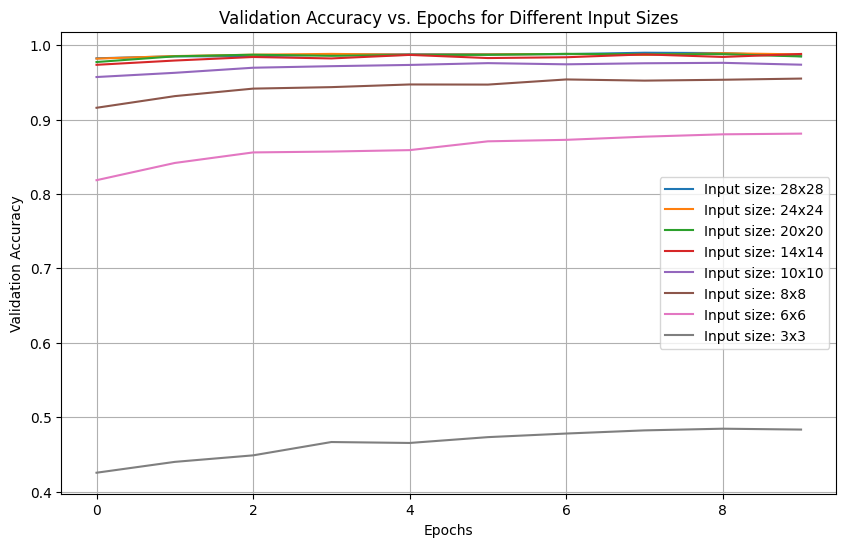

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.image import resize
import matplotlib.pyplot as plt

# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Add a channel dimension (needed for CNN)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define a function to preprocess the data for a specific input size
def preprocess_data(x, new_size):
    x_resized = resize(x, [new_size, new_size])
    return x_resized.numpy()

# Define a function to build a CNN model for a given input size
def build_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(10, activation='softmax')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Experiment with different input sizes
input_sizes = [28, 24, 20, 14, 10, 8, 6, 3]
results = {}

for size in input_sizes:
    print(f"Training with input size: {size}x{size}")
    x_train_resized = preprocess_data(x_train, size)
    x_test_resized = preprocess_data(x_test, size)

    model = build_model((size, size, 1))
    history = model.fit(
        x_train_resized, y_train,
        epochs=10,
        batch_size=128,
        validation_split=0.2,
        verbose=1
    )
    results[size] = history.history['val_accuracy']

# Plot validation accuracy for different input sizes
plt.figure(figsize=(10, 6))
for size, val_accuracy in results.items():
    plt.plot(val_accuracy, label=f"Input size: {size}x{size}")
plt.title("Validation Accuracy vs. Epochs for Different Input Sizes")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Find the maximum number of epochs (should be 10 in your case)
max_epochs = max(len(acc) for acc in results.values())

# Prepare data for the table
table = {"Epoch": list(range(1, max_epochs + 1))}
for size, val_accuracy in results.items():
    # Pad with None if some runs have fewer epochs (shouldn't happen here)
    padded = val_accuracy + [None] * (max_epochs - len(val_accuracy))
    table[f"{size}x{size}"] = padded

# Create DataFrame
df = pd.DataFrame(table)

# Print the table
print(df.to_string(index=False))

 Epoch    28x28    24x24    20x20    14x14    10x10      8x8      6x6      3x3
     1 0.982333 0.981917 0.977333 0.973583 0.957167 0.915833 0.818500 0.425333
     2 0.985000 0.985333 0.985000 0.979333 0.962833 0.931500 0.841667 0.439917
     3 0.985000 0.987167 0.987167 0.984083 0.969667 0.941583 0.855833 0.448667
     4 0.987333 0.988250 0.985667 0.982167 0.971750 0.943583 0.857000 0.466583
     5 0.987750 0.987167 0.986917 0.986917 0.973417 0.947167 0.858917 0.465333
     6 0.987667 0.987500 0.987000 0.982667 0.975833 0.947000 0.870750 0.473167
     7 0.987917 0.988167 0.988333 0.983750 0.974250 0.953917 0.872750 0.478000
     8 0.989833 0.986917 0.987750 0.987583 0.975667 0.952333 0.877000 0.482250
     9 0.989333 0.989167 0.987917 0.984167 0.976250 0.953500 0.880167 0.484500
    10 0.985250 0.987583 0.984833 0.988167 0.973750 0.955083 0.881083 0.483333


## Key Findings

- **Input Size Trade-off**: Smaller inputs reduce compute cost but also accuracy. Avoid going below ~14×14 for MNIST-level complexity.
- **Kernel Size Sweet Spot**: 3×3 and 5×5 are optimal; they balance local feature capture with efficiency.
- **Guidelines**: Preserve resolution when possible, and use small-to-medium kernels for robust performance.

---
